MOUNtiNG Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTING LIBRARIES

In [ ]:
# Importing Libraries
import numpy as np                       # importing the numpy lib.
import pandas as pd                      # importing the pandas lib.
import seaborn as sns                    # importing the seaborn lib.
from sklearn.metrics import  r2_score,mean_squared_error,mean_absolute_error  #imorting r2 score, mean squared error and mean absolute error
from sklearn.tree import DecisionTreeRegressor  # Decision Tree
from sklearn.ensemble import AdaBoostRegressor  #imorting AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor #imorting RandomForestRegressor
from sklearn.model_selection import train_test_split # imorting train_test_split
from sklearn.preprocessing import StandardScaler  # imorting StandardScaler

Data set loading

In [ ]:
# Loading dataset
data_set = pd.read_csv("/content/drive/MyDrive/cardekho.csv") #loading data set


In [ ]:
data_set.head() #Viewing top rows of dataset


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
# Viewing last rows from dataset
data_set.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [ ]:
data_set.info()# information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
data_set.isnull().sum() # Checkinh NULL values in data columns

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


<Axes: >

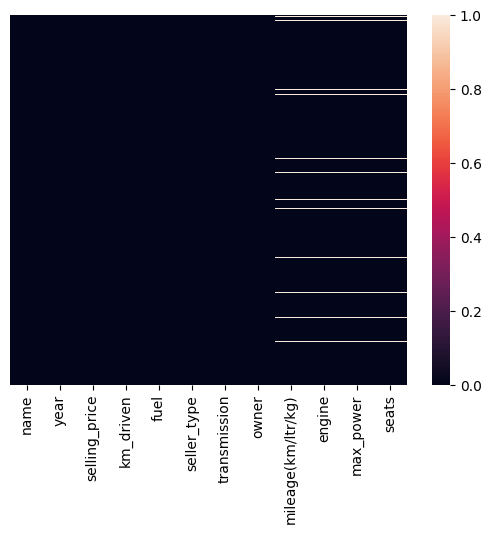

In [ ]:
sns.heatmap(data_set.isnull(),yticklabels = False ) #heatmap showing null values by white colour

In [ ]:
data_set.dropna(subset=['seats','max_power','engine','mileage(km/ltr/kg)'], inplace=True) # droping null rows

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7907 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7907 non-null   object 
 1   year                7907 non-null   int64  
 2   selling_price       7907 non-null   int64  
 3   km_driven           7907 non-null   int64  
 4   fuel                7907 non-null   object 
 5   seller_type         7907 non-null   object 
 6   transmission        7907 non-null   object 
 7   owner               7907 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7907 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 803.1+ KB


In [ ]:
data_set.isnull().sum() #Checking the data is cleaned

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


<Axes: >

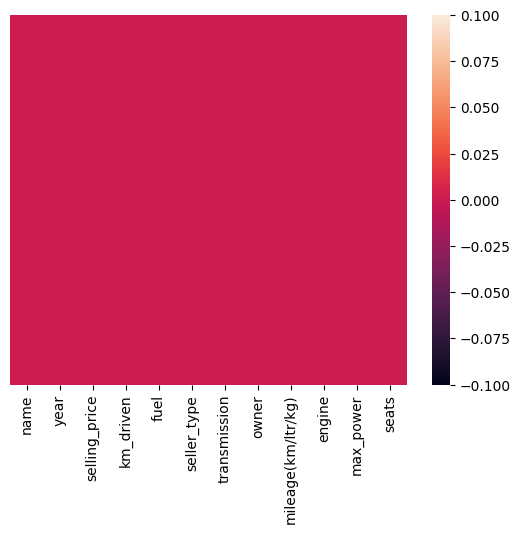

In [ ]:
sns.heatmap(data_set.isnull(),yticklabels = False ) #heatmap  Checking the data is cleaned

# data visualisation

<ipython-input-128-076f6b172c24>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 90)


<Axes: xlabel='seller_type', ylabel='count'>

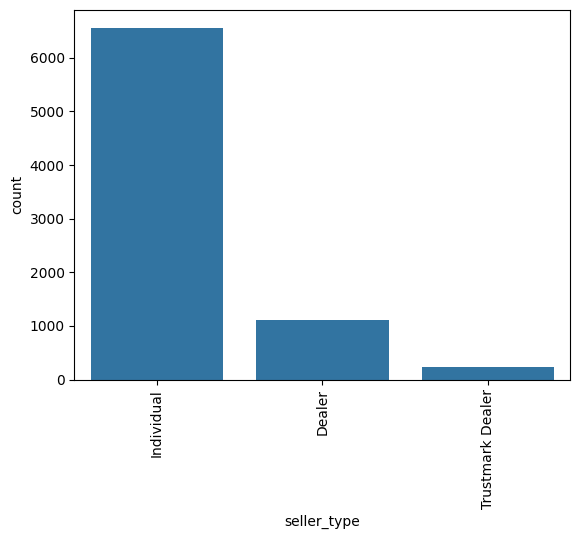

In [ ]:
plt = sns.countplot(x='seller_type', data=data_set)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 90)
plt
#graph show's how many type of seller types are and what is the count of it


<Axes: xlabel='fuel', ylabel='selling_price'>

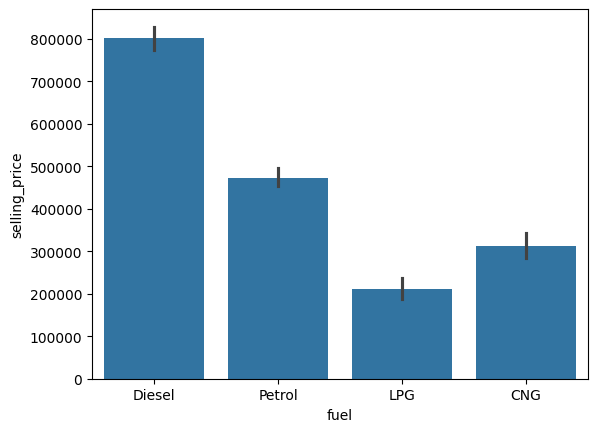

In [ ]:
sns.barplot(x= "fuel" , y = "selling_price", data = data_set  )
#graph tell's which type of fuel cars are selling at which price

<ipython-input-130-b720f3edf7db>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 100)


<Axes: xlabel='owner', ylabel='count'>

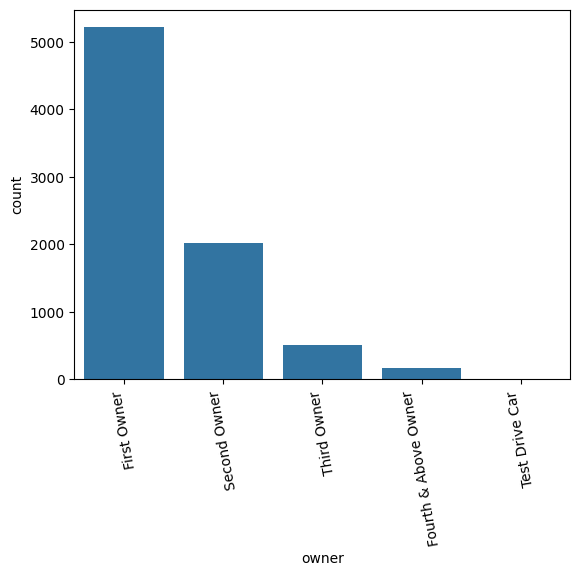

In [ ]:
plt = sns.countplot(x='owner', data=data_set)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 100)
plt
# Grap to show no of holder has owner

<Axes: xlabel='seller_type', ylabel='selling_price'>

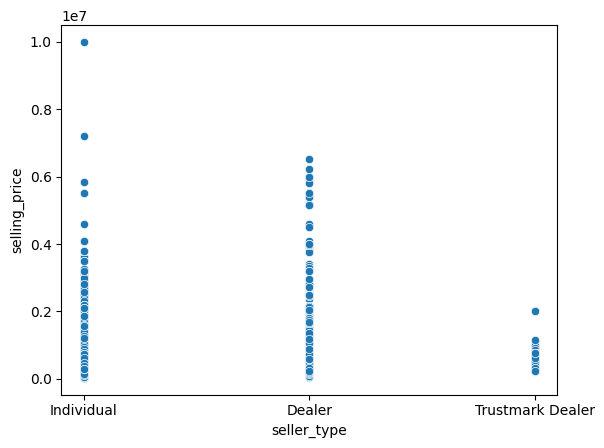

In [ ]:
sns.scatterplot(x= "seller_type" , y = "selling_price", data = data_set)
#graph to show seller type at which price

<ipython-input-132-f767d6ff97d7>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(plt.get_xticklabels(),rotation = 100)


<Axes: xlabel='transmission', ylabel='count'>

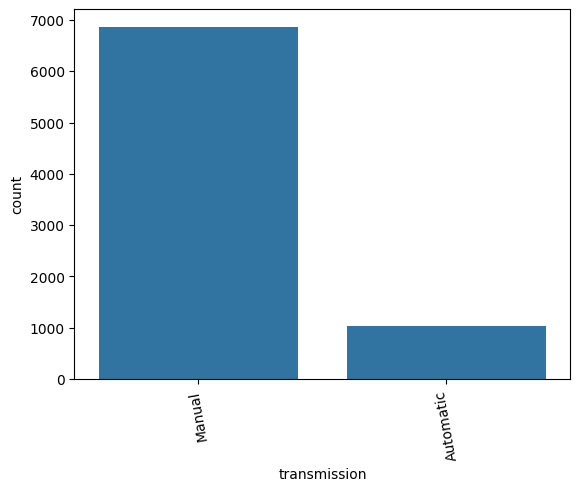

In [ ]:
plt = sns.countplot(x='transmission', data=data_set)
plt.set_xticklabels(plt.get_xticklabels(),rotation = 100)
plt
# Grap to show no of holder has transmission

<Axes: xlabel='owner', ylabel='selling_price'>

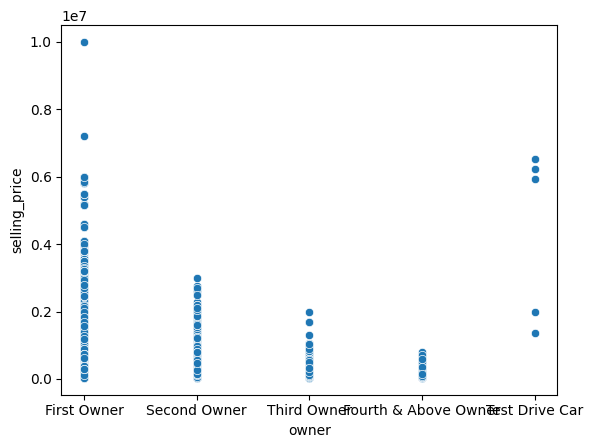

In [ ]:
sns.scatterplot(x= "owner" , y = "selling_price", data = data_set)
#graph show's which owner selling price is most and which having least

<Axes: xlabel='mileage(km/ltr/kg)', ylabel='selling_price'>

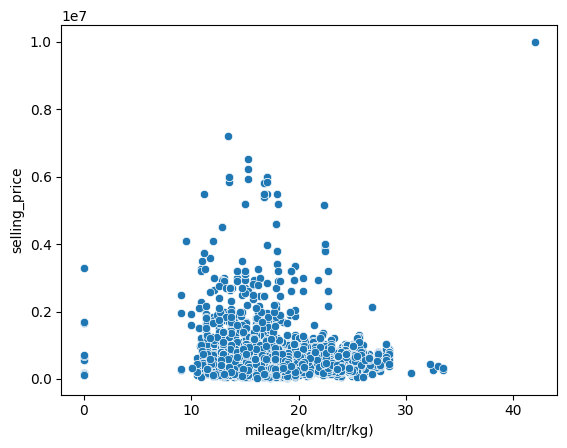

In [ ]:
sns.scatterplot(x= "mileage(km/ltr/kg)" , y = "selling_price", data = data_set)
# graph to show price based on mileage

<Axes: xlabel='seats', ylabel='count'>

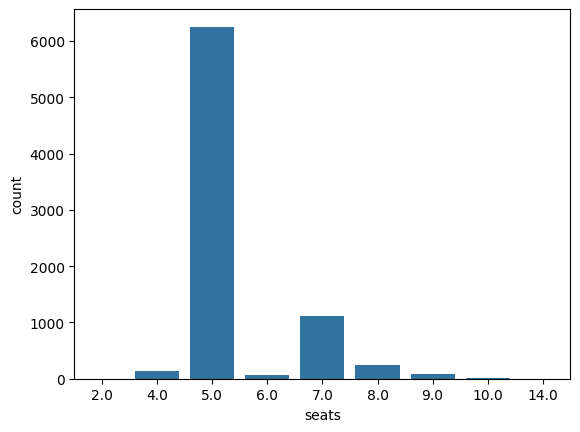

In [ ]:
sns.countplot(x= "seats" , data = data_set) #count of seats

<Axes: xlabel='engine', ylabel='selling_price'>

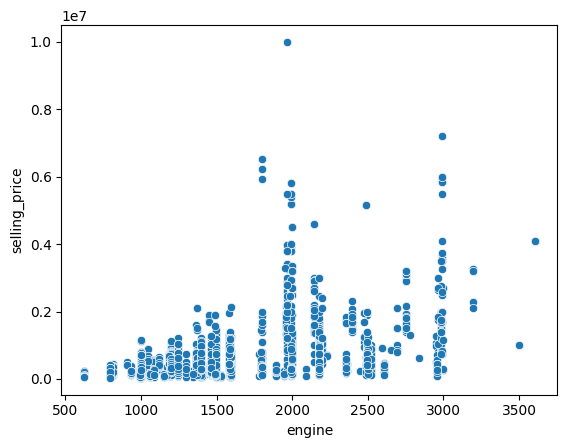

In [ ]:
sns.scatterplot(x= "engine" , y = "selling_price", data = data_set  )
#graph to show price based on engine

<Axes: >

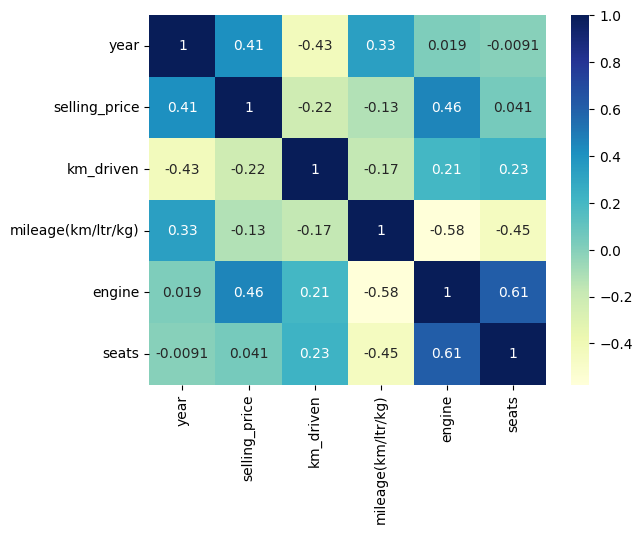

In [ ]:
sns.heatmap(data_set.select_dtypes(["number"]).corr(),annot= True , cmap = "YlGnBu") # Correlation Heatmap (numeric features only)

#data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data_set['fuel'] = enc.fit_transform(data_set['fuel']) # transform non numeric to numeric values
data_set['seller_type'] = enc.fit_transform(data_set['seller_type'])
data_set['transmission'] = enc.fit_transform(data_set['transmission'])
data_set['owner'] = enc.fit_transform(data_set['owner'])

<Axes: >

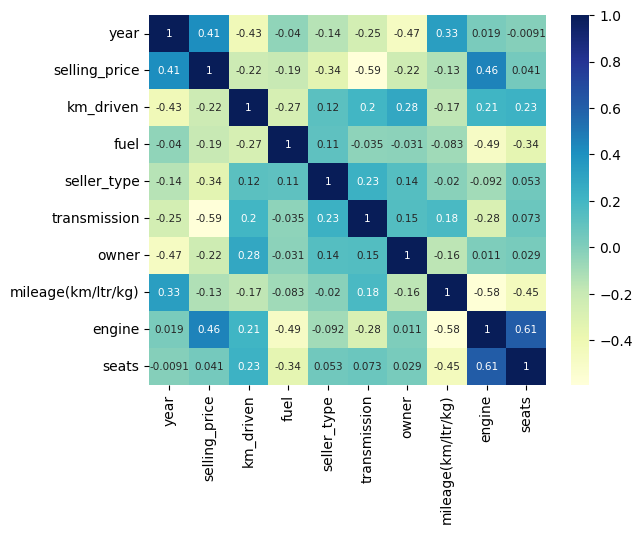

In [ ]:
sns.heatmap(data_set.select_dtypes(["number"]).corr(),annot= True ,annot_kws={'size': 7.5}, cmap = "YlGnBu") # Correlation Heatmap (numeric features as well as non numeric)

In [ ]:
# Creating the X and y for the model training and testing (X=input) and (y=output)
y = data_set["selling_price"]
x = data_set.select_dtypes(["number"])
x=x.drop(columns= "selling_price")
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,seats
0,2014,145500,1,1,1,0,23.40,1248.0,5.0
1,2014,120000,1,1,1,2,21.14,1498.0,5.0
2,2006,140000,3,1,1,4,17.70,1497.0,5.0
3,2010,127000,1,1,1,0,23.00,1396.0,5.0
4,2007,120000,3,1,1,0,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,0,18.50,1197.0,5.0
8124,2007,119000,1,1,1,1,16.80,1493.0,5.0
8125,2009,120000,1,1,1,0,19.30,1248.0,5.0
8126,2013,25000,1,1,1,0,23.57,1396.0,5.0


Dataset Split For the Modeling Purpose

In [ ]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

Data Scalerization for Modeling

In [ ]:
# Scale numerical features using StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[-2.05672064e+00, -1.27620108e-01,  1.11948371e+00, ...,
        -1.27642755e-01, -9.18038024e-01, -4.38587007e-01],
       [-2.52418864e-01,  4.90637360e-01, -8.78748113e-01, ...,
         2.57584694e-01,  5.59915083e-04, -4.38587007e-01],
       [ 7.78610722e-01, -6.07203003e-01,  1.11948371e+00, ...,
         8.87283409e-01, -9.16054011e-01, -4.38587007e-01],
       ...,
       [-2.82999283e+00,  3.94335573e-01,  1.11948371e+00, ...,
        -1.53520459e+00,  6.80163512e-02, -4.38587007e-01],
       [-5.10176260e-01, -1.83475144e-01, -8.78748113e-01, ...,
        -1.06601731e+00,  1.42508113e+00,  1.64092035e+00],
       [ 5.33853264e-03,  1.06844808e+00, -8.78748113e-01, ...,
         7.16894345e-01,  2.40625467e-01, -4.38587007e-01]])

# MODELING

Decision Tree Regressor

In [ ]:

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train_scaled,y_train) # Fit the model with training dataset
y_pred = regressor.predict(x_test_scaled) # Test the model with testing data
dtc_r2 = r2_score(y_test,y_pred) # r2 score of decision tree
print("r2 score of decision tree is ",dtc_r2)
dtc_mse = mean_squared_error(y_test,y_pred)  # mean squared error of  decision tree
print("mean squared error is ",dtc_mse)
dtc_mae = mean_absolute_error(y_test,y_pred) #   mean absolute error of  decision tree
print("mean absolute error is ",dtc_mae)

r2 score of decision tree is  0.9563262785231401
mean squared error is  32648689497.731655
mean absolute error is  79484.7325977857


AdaBoost Regressor

In [ ]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train_scaled, y_train)
regr.predict(x_test_scaled)
ada_r2 = r2_score(y_test,regr.predict(x_test_scaled)) # r2 score of AdaBoostRegressor
print("r2 score of ADaBoostRegressor is ",ada_r2)
ada_mse = mean_squared_error(y_test,regr.predict(x_test_scaled)) # mean squared error of AdaBoostRegressor
print("mean squared error is ",dtc_mse)
ada_mae = mean_absolute_error(y_test,regr.predict(x_test_scaled)) #   mean absolute error of AdaBoostRegressor
print("mean absolute error is ",dtc_mae)

r2 score of ADaBoostRegressor is  0.8580482543708047
mean squared error is  32648689497.731655
mean absolute error is  79484.7325977857


 Random Forest Regressor

In [ ]:
mod = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators is  the number of decision trees in the forest
mod.fit(x_train_scaled, y_train)
mod.predict(x_test_scaled)
mod_r2 = r2_score(y_test,mod.predict(x_test_scaled)) # r2 score of RandomForestRegressor
print("r2 score of RandomForestRegressor is ",mod_r2)
ada_mse = mean_squared_error(y_test,mod.predict(x_test_scaled))
print("mean squared error is ",dtc_mse)
ada_mae = mean_absolute_error(y_test,mod.predict(x_test_scaled))
print("mean absolute error is ",dtc_mae)

r2 score of RandomForestRegressor is  0.967790741504087
mean squared error is  32648689497.731655
mean absolute error is  79484.7325977857


# comparision

In [ ]:
data = [['RandomForestRegressor',mod_r2],['DecisionTreeRegressor',dtc_r2 ],['AdaBoost Regressor',ada_r2]]
data = pd.DataFrame(data, columns=['Model', 'r2_score'])
data

,Model,r2_score
0,RandomForestRegressor,0.967791
1,DecisionTreeRegressor,0.956326
2,AdaBoost Regressor,0.858048


<ipython-input-147-805ee9461008>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation = 90)


<Axes: title={'center': 'Model r2_score'}, xlabel='Model', ylabel='r2_score'>

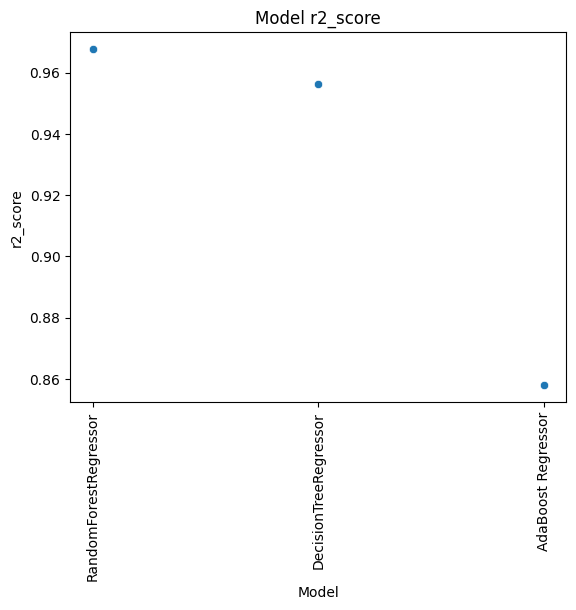

In [ ]:
my_plot = sns.scatterplot(x='Model',y='r2_score', data= data )
my_plot.set_title("Model r2_score")
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation = 90)
my_plot